In [26]:
from project_lib.genotype_simulation import *
from project_lib.stat_functions import *

In [27]:
df = pedigree_init(4)

In [28]:
df

,id,parent0,parent1,time
0,0,.,.,0
1,1,.,.,0
2,2,.,.,0
3,3,.,.,0


In [29]:
df = add_selfing(df, size_diff = 2)

In [30]:
df

,id,parent0,parent1,time
0,0,.,.,1
1,1,.,.,1
2,2,.,.,1
3,3,.,.,1
4,4,0,0,0
5,5,1,1,0
6,6,2,2,0
7,7,3,3,0
8,8,0,0,0
9,9,1,1,0


In [31]:
df = add_random_mating(df, selfing_rate = 0)
df = add_random_mating(df, selfing_rate = 0.5)
df = add_random_mating(df, selfing_rate = 1)

In [32]:
df

,id,parent0,parent1,time
0,0,.,.,4
1,1,.,.,4
2,2,.,.,4
3,3,.,.,4
4,4,0,0,3
5,5,1,1,3
6,6,2,2,3
7,7,3,3,3
8,8,0,0,3
9,9,1,1,3


In [33]:
test_ts = df_to_ts(df, 100)

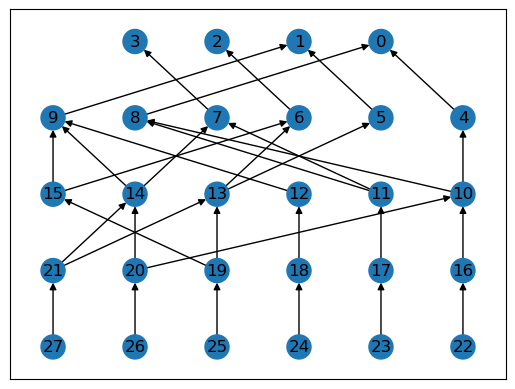

In [34]:
#draw pedigree with 4 founders, selfing f1, random f2, 0.5 selfing f3, selfing f4
draw_pedigree(test_ts.tree_sequence())

In [35]:
arg_norec = msprime.sim_ancestry(
    initial_state=test_ts, model="fixed_pedigree", random_seed=42, recombination_rate = 0)

In [36]:
print(arg_norec.dump_tables().edges)

╔══╤════╤═════╤══════╤═════╤════════╗
║id│left│right│parent│child│metadata║
╠══╪════╪═════╪══════╪═════╪════════╣
║0 │   0│  100│    37│   48│        ║
║1 │   0│  100│    37│   49│        ║
║2 │   0│  100│    39│   50│        ║
║3 │   0│  100│    39│   51│        ║
║4 │   0│  100│    40│   52│        ║
║5 │   0│  100│    40│   53│        ║
║6 │   0│  100│    42│   54│        ║
║7 │   0│  100│    42│   55│        ║
║8 │   0│  100│    20│   44│        ║
║9 │   0│  100│    20│   45│        ║
║10│   0│  100│     0│   40│        ║
║11│   0│  100│     0│   46│        ║
║12│   0│  100│     1│   20│        ║
║13│   0│  100│     3│   37│        ║
║14│   0│  100│     4│   39│        ║
║15│   0│  100│     5│   42│        ║
║16│   0│  100│     6│   47│        ║
╚══╧════╧═════╧══════╧═════╧════════╝



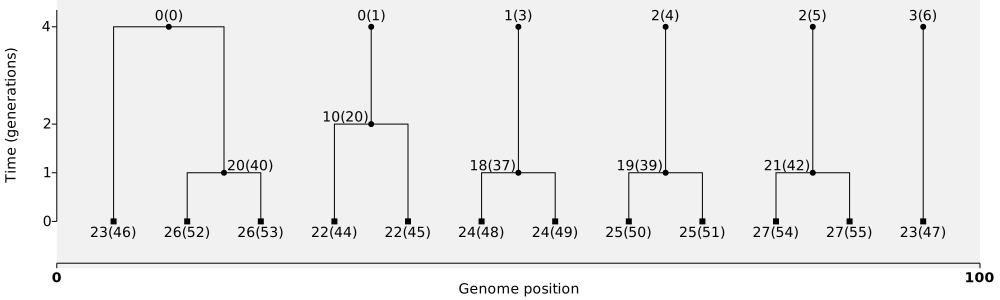

In [37]:
draw_ancestry(arg_norec, x_size = 1000, y_size = 300)

In [56]:
arg_rec = msprime.sim_ancestry(
    initial_state=test_ts, model="fixed_pedigree", random_seed=42, recombination_rate = 0.0003)

In [57]:
print(arg_rec.dump_tables().edges)

╔══╤════╤═════╤══════╤═════╤════════╗
║id│left│right│parent│child│metadata║
╠══╪════╪═════╪══════╪═════╪════════╣
║0 │   0│  100│    35│   46│        ║
║1 │   0│  100│    35│   47│        ║
║2 │   0│  100│    36│   48│        ║
║3 │   0│  100│    36│   49│        ║
║4 │   0│  100│    38│   50│        ║
║5 │   0│  100│    38│   51│        ║
║6 │  70│  100│    43│   54│        ║
║7 │  70│  100│    43│   55│        ║
║8 │   0│    3│    20│   44│        ║
║9 │   0│  100│    20│   45│        ║
║10│   0│  100│    20│   52│        ║
║11│   0│   70│    26│   38│        ║
║12│   0│   70│    26│   54│        ║
║13│   0│  100│    14│   35│        ║
║14│   0│  100│    14│   53│        ║
║15│   0│  100│    19│   36│        ║
║16│  70│  100│    19│   43│        ║
║17│   0│   70│    19│   55│        ║
║18│   0│  100│     0│   20│        ║
║19│   3│  100│     1│   44│        ║
║20│   0│  100│     3│   19│        ║
║21│   0│   70│     3│   26│        ║
║22│  70│  100│     3│   38│        ║
║23│   0│  1

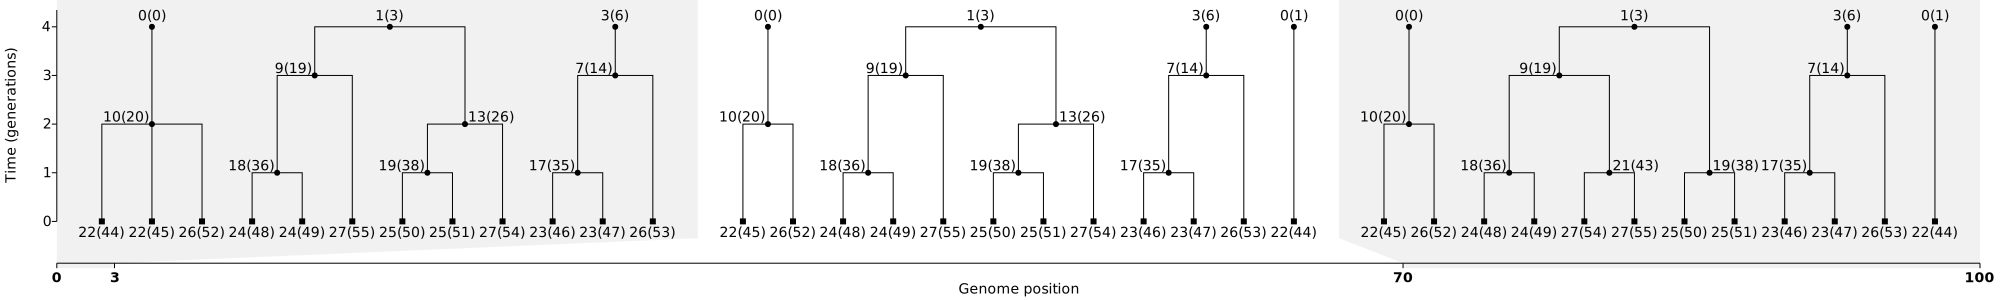

In [59]:
draw_ancestry(arg_rec, x_size = 2000, y_size = 300)